Рыженко Ю.В.
# Лабораторная работа №2

Загрузите данные close_prices.csv. В этом файле приведены цены акций 30 компаний на закрытии торгов за каждый день периода между 2013 и 2015 годами.

На загруженных данных обучите преобразование PCA с числом компонент равным 10. 

1. Скольких компонент хватит, чтобы объяснить 90% дисперсии?
2. Примените построенное преобразование к исходным данным и возьмите значения первой компоненты.

Загрузите информацию об индексе Доу-Джонса из файла djia_index.csv. 

3. Чему равна корреляция Пирсона между первой компонентой и индексом Доу-Джонса?
4. Какая компания имеет наибольший вес в первой компоненте? Укажите ее название.

AttributeError: 'float' object has no attribute 'shape'

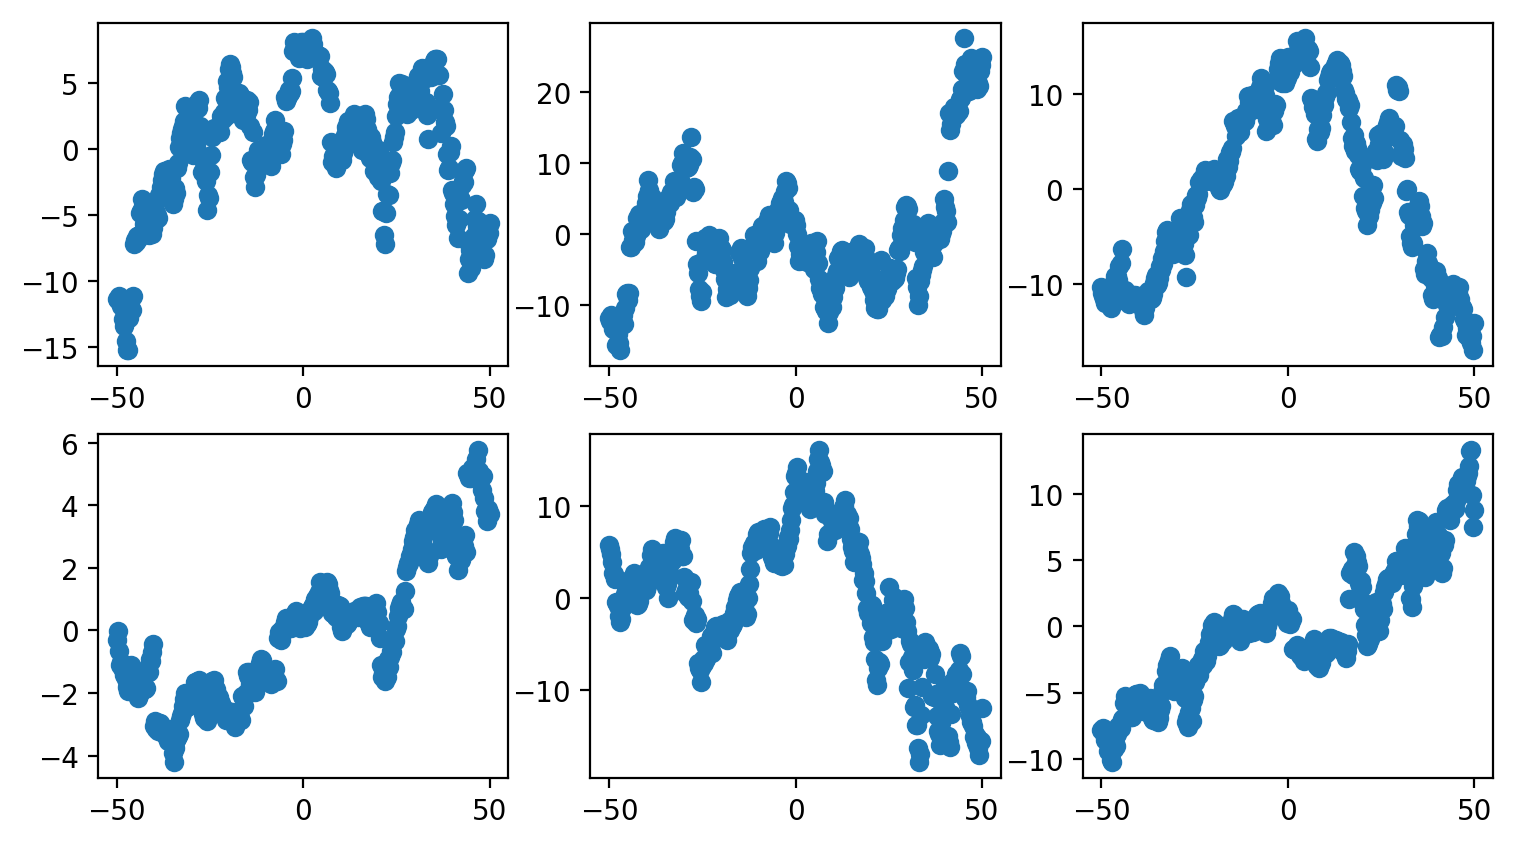

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Path = 'D:/Altair/Project/2021/Повышение квалификации/close_prices.csv'

Prices = pd.read_csv(Path, delimiter=',')                          # Открыть сразу в массив

#Prices.columns                                                    # Показать наименование колонок
#print(Prices)

Prices_numpy = Prices.to_numpy().astype(float)                                                  # Сконвертировать в numpy
#print(Prices_numpy)

#Prices.shape

# Отцентрируем данные. Это необходимо для расчета ковариационной матрицы.
# Расчитаем среднее значение по столбцам и вычтем его из каждого элемента столбца 

# Расчет среднего.
np.mean(Prices_numpy[1:,1:] , axis = 0)
# Вычитание из каждого элемента 
Prices_centerd = Prices_numpy[1:,1:] - np.mean(Prices_numpy[1:,1:] , axis = 0)
#Prices_centerd.shape

# Выведем на график полученные распределения "измерений" пяти переменных
xx = np.linspace(-50,50,373) # количество элементов в массивах по х и у должно совпадать, если выводить таким образом

yy1 = Prices_centerd[:,0] # выделение одного столбца из массива
yy2 = Prices_centerd[:,1]
yy3 = Prices_centerd[:,2]
yy4 = Prices_centerd[:,3]
yy5 = Prices_centerd[:,4]
yy6 = Prices_centerd[:,5]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9,5), dpi=200)
plt.subplot(2, 3, 1)
plt.scatter(xx,yy1)
plt.subplot(2, 3, 2)
plt.scatter(xx,yy2)
plt.subplot(2, 3, 3)
plt.scatter(xx,yy3)
plt.subplot(2, 3, 4)
plt.scatter(xx,yy4)
plt.subplot(2, 3, 5)
plt.scatter(xx,yy5)
plt.subplot(2, 3, 6)
plt.scatter(xx,yy6)


# Рассчитаем ковариационную матрицу для отцентрированных данных.
# Обратите внимание на параметр rowvar = False или равносильный эквивалент rowvar = 0
# В этом случае каждый вектор-столбец рассматривается как переменная, которая сравнивается с другими переменными, также
# представленными соответствующими векторами.
# Значение этого параметра по умолчанию rowvar = True или rowvar = 1. В этом случае в качестве переменных рассматриваются
# строки и ковариационная матрица будет иметь размер, соответствующий числу строк в массиве
cov_mat = np.cov(Prices_centerd, rowvar = False)

#Prices_cov_mat

